# **Importing library**

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import operator
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import spacy 
from textstat import flesch_reading_ease,flesch_kincaid_grade

# **Loading Data**

In [4]:
data_1.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [5]:
print("Generated By LLM :",data_1[data_1['generated']==1].shape[0])
print("Written by a Student :",data_1[data_1['generated']==0].shape[0])

Generated By LLM : 3
Written by a Student : 1375


In [7]:
data_2.head()

,text,label
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [8]:
print("Generated By LLM :",data_2[data_2['label']==1].shape[0])
print("Written by a Student :",data_2[data_2['label']==0].shape[0])

Generated By LLM : 1621
Written by a Student : 14250


In [9]:
data_human=data_1[data_1['generated']==0]
data_LLM=data_2[data_2['label']==1]

# **Text Analysis**

<Axes: >

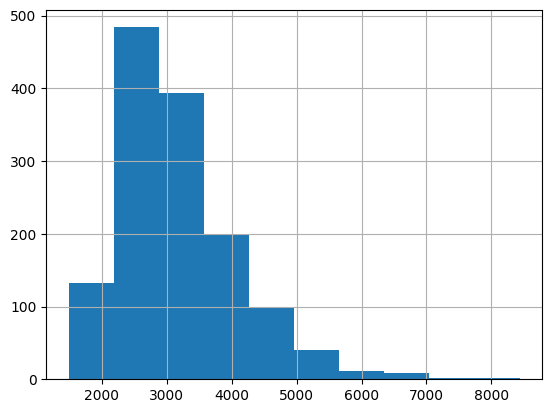

In [10]:
#Human
data_human['text'].str.len().hist()#string length

<Axes: >

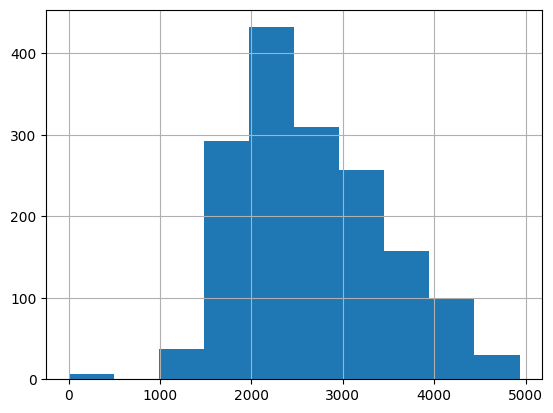

In [11]:
#LLM
data_LLM['text'].str.len().hist()#string length

**String length** is between 1500 and 4500 for LLM .

**String length** is between 1500 and 5000 for human .

The range of length of string is more for humans and this histogram decreases more smothly as compared to that of LLM.

<Axes: >

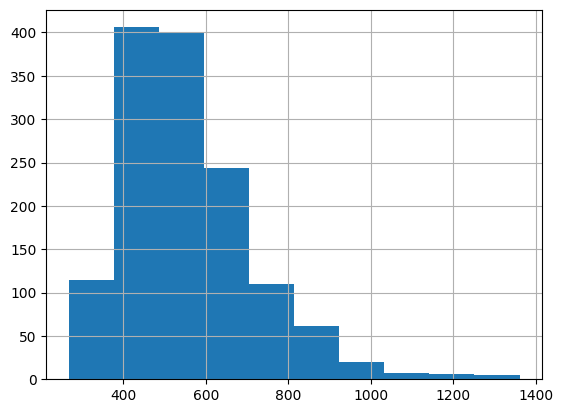

In [12]:
#Human
data_human['text'].str.split().map(lambda x: len(x)).hist()#number of words

<Axes: >

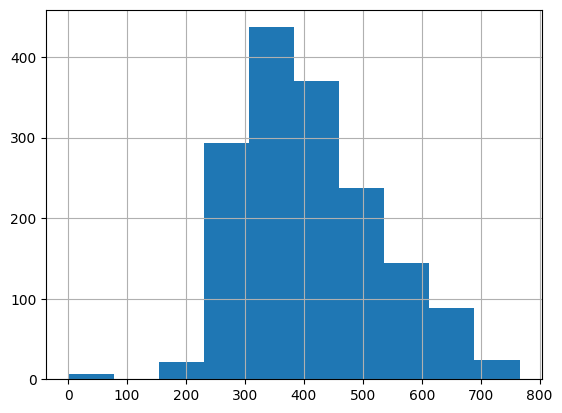

In [13]:
#LLM
data_LLM['text'].str.split().map(lambda x: len(x)).hist()#number of words

<Axes: >

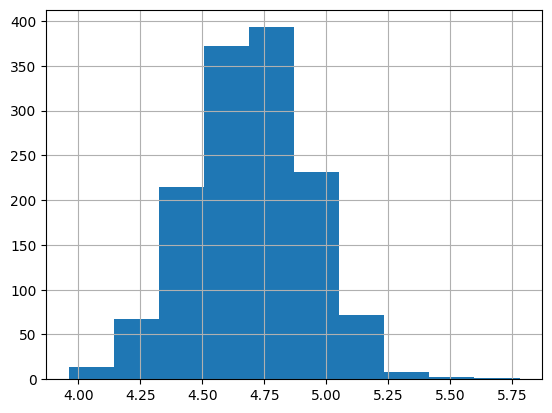

In [14]:
#Human
data_human['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist() #average word length in each sentence

<Axes: >

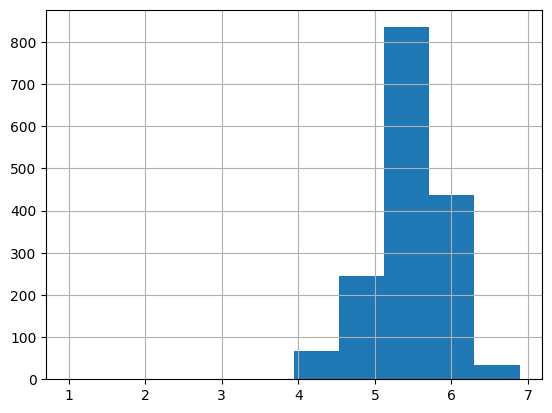

In [15]:
#LLM
data_LLM['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()#average word length in each sentence

In [16]:
stop=set(nltk.corpus.stopwords.words('english'))

In [17]:
#human
corpus_human=[]
new1= data_human['text'].str.split()
new1=new1.values.tolist()
corpus_human=[word for i in new1 for word in i]

dic_human={}
for word in corpus_human:
    if word in stop:
        if word not in dic_human.keys():
            dic_human[word]=1
        else :
            dic_human[word]+=1

In [18]:
#LLM
corpus_LLM=[]
new2= data_LLM['text'].str.split()
new2=new2.values.tolist()
corpus_LLM=[word for i in new2 for word in i]

dic_LLM={}
for word in corpus_LLM:
    if word in stop:
        if word not in dic_LLM.keys():
            dic_LLM[word]=1
        else :
            dic_LLM[word]+=1

<BarContainer object of 15 artists>

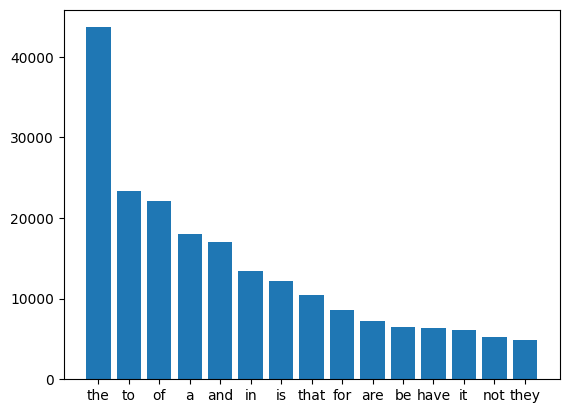

In [19]:
#Human
top_15=sorted(dic_human.items(), key=lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top_15)
plt.bar(x,y)

<BarContainer object of 15 artists>

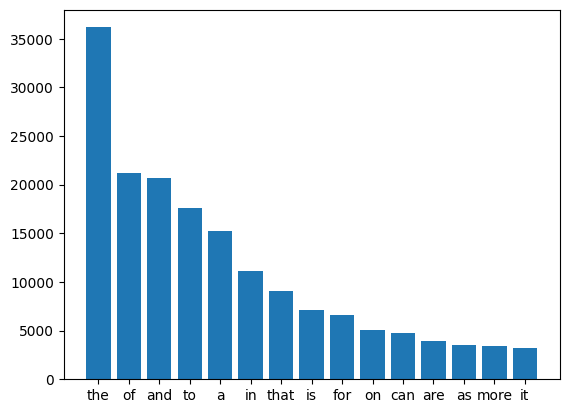

In [20]:
#LLM
top_15=sorted(dic_LLM.items(), key=lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top_15)
plt.bar(x,y)

**Stop words** show us that the use of such words is almost same in both the both type of texts .

<BarContainer object of 9 artists>

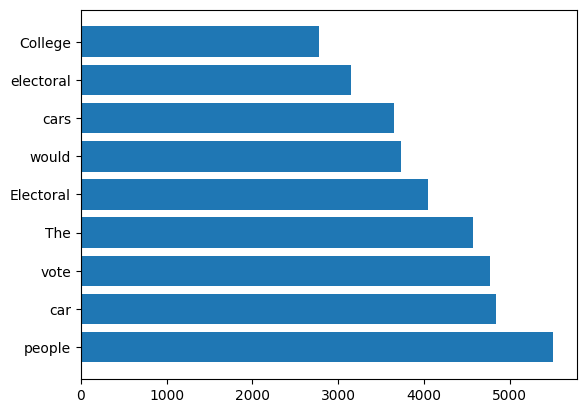

In [21]:
#Human
counter=Counter(corpus_human)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.barh(x,y)

<BarContainer object of 13 artists>

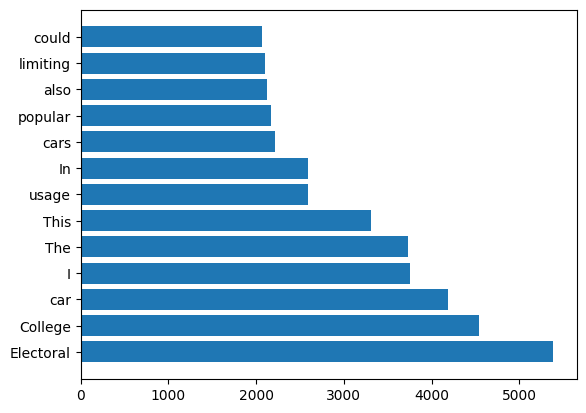

In [22]:
#LLM
counter=Counter(corpus_LLM)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.barh(x,y)

Though the **most used words** are different but they point towards similar topics .Which makes sense as there are only two prompts for generating text in given data.

In [23]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<BarContainer object of 10 artists>

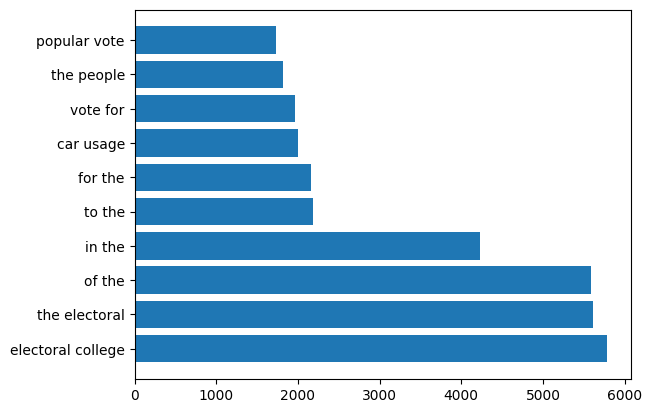

In [24]:
#Human
top_n_bigrams=get_top_ngram(data_human['text'],2)[:10] #2gram
x,y=map(list,zip(*top_n_bigrams)) 
plt.barh(x,y)

<BarContainer object of 10 artists>

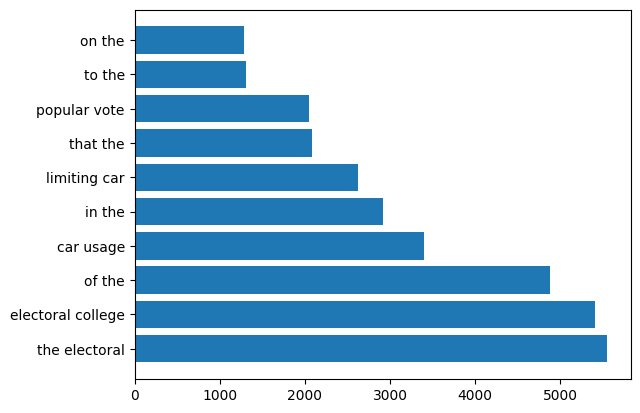

In [25]:
#LLM
top_n_bigrams=get_top_ngram(data_LLM['text'],2)[:10]#2gram
x,y=map(list,zip(*top_n_bigrams)) 
plt.barh(x,y)

**2 gram** shows us that human and LLM text both use **'the'** and **'electoral'** heavily.

<BarContainer object of 10 artists>

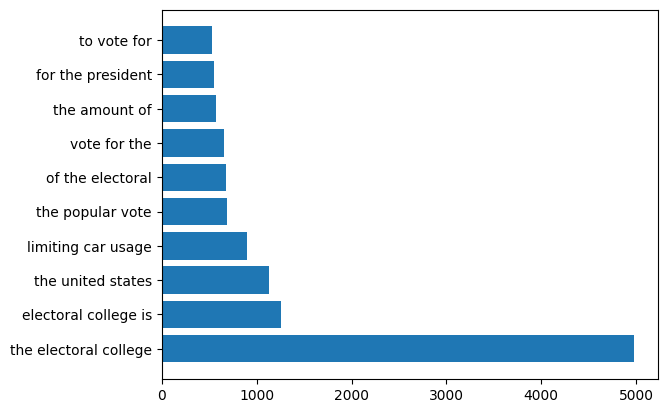

In [26]:
#Human
top_n_bigrams=get_top_ngram(data_human['text'],3)[:10] # 3_gram
x,y=map(list,zip(*top_n_bigrams)) 
plt.barh(x,y)

<BarContainer object of 10 artists>

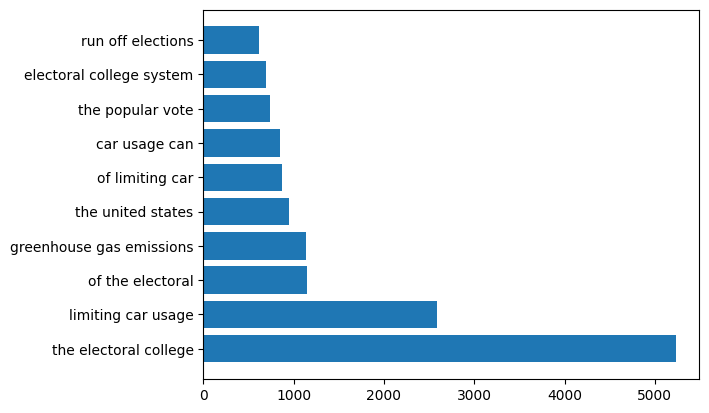

In [27]:
#LLM
top_n_bigrams=get_top_ngram(data_LLM['text'],3)[:10] #3_gram
x,y=map(list,zip(*top_n_bigrams)) 
plt.barh(x,y)

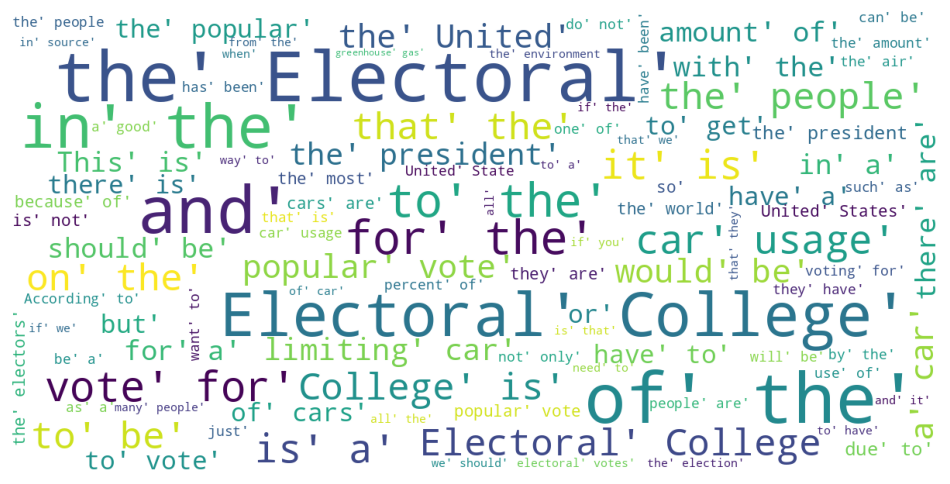

In [28]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus_human)

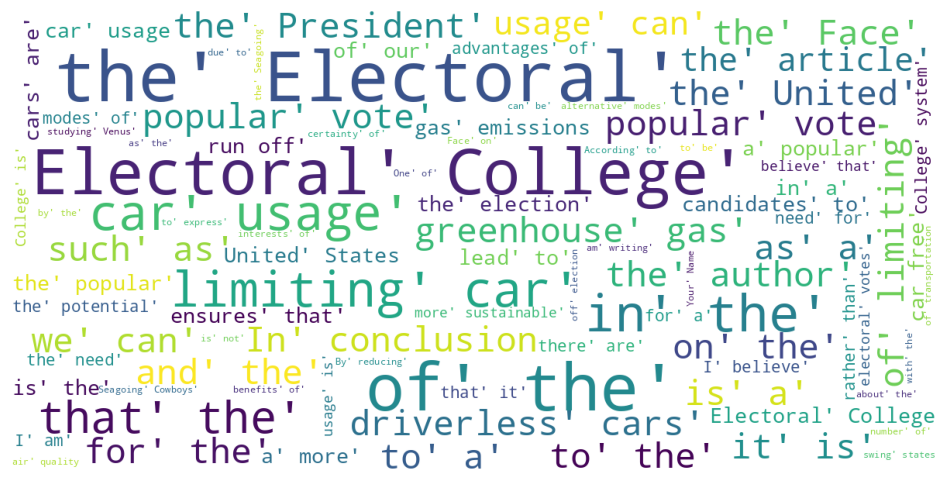

In [29]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus_LLM)

# **Sentiment analysis**

/tmp/ipykernel_20/861659274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_human['polarity_score']=data_human['text'].apply(lambda x : polarity(x))


<Axes: >

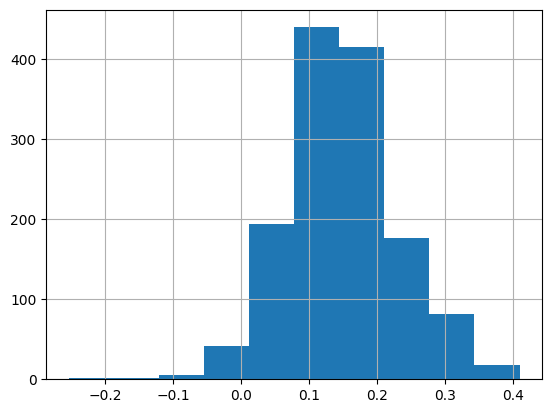

In [30]:
#Human
def polarity(text):
    return TextBlob(text).sentiment.polarity

data_human['polarity_score']=data_human['text'].apply(lambda x : polarity(x))
data_human['polarity_score'].hist()

/tmp/ipykernel_20/3889556380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LLM['polarity_score']=data_LLM['text'].apply(lambda x : polarity(x))


<Axes: >

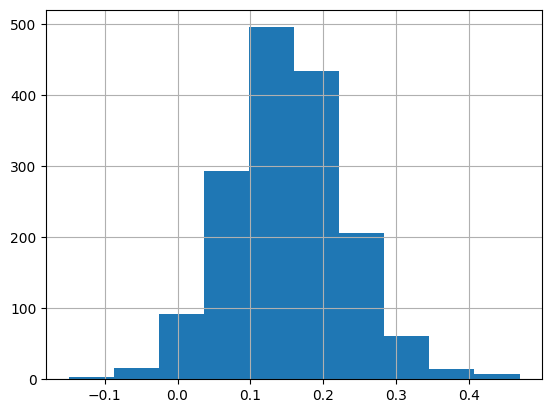

In [31]:
#LLM
def polarity(text):
    return TextBlob(text).sentiment.polarity

data_LLM['polarity_score']=data_LLM['text'].apply(lambda x : polarity(x))
data_LLM['polarity_score'].hist()

/tmp/ipykernel_20/1423995716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_human['polarity']=data_human['polarity_score'].map(lambda x: sentiment(x))


<BarContainer object of 2 artists>

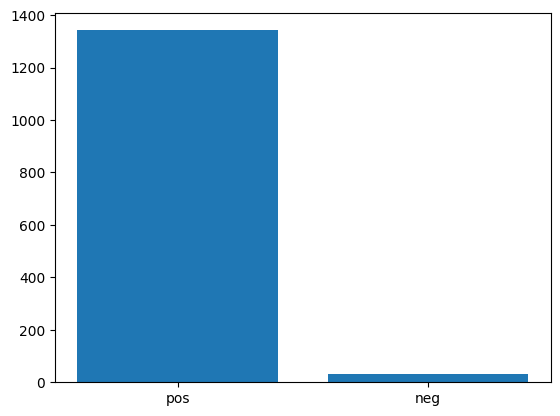

In [32]:
#Human
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

data_human['polarity']=data_human['polarity_score'].map(lambda x: sentiment(x))

plt.bar(data_human.polarity.value_counts().index,data_human.polarity.value_counts())

/tmp/ipykernel_20/3151629926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LLM['polarity']=data_LLM['polarity_score'].map(lambda x: sentiment(x))


<BarContainer object of 3 artists>

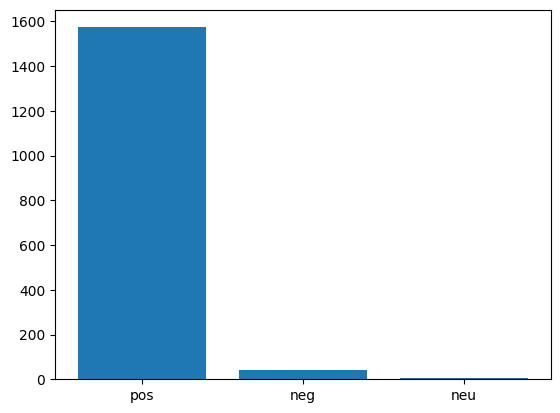

In [33]:
#LLM
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

data_LLM['polarity']=data_LLM['polarity_score'].map(lambda x: sentiment(x))

plt.bar(data_LLM.polarity.value_counts().index,data_LLM.polarity.value_counts())

In [34]:
nlp = spacy.load("en_core_web_sm")

<BarContainer object of 18 artists>

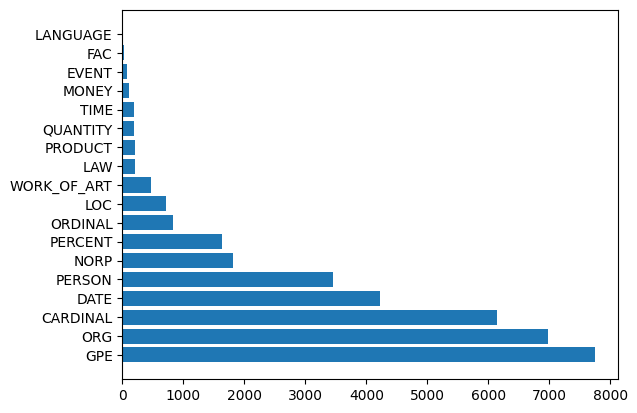

In [35]:
#Human
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=data_human['text'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()
x,y=map(list,zip(*count))
plt.barh(x,y)

<BarContainer object of 17 artists>

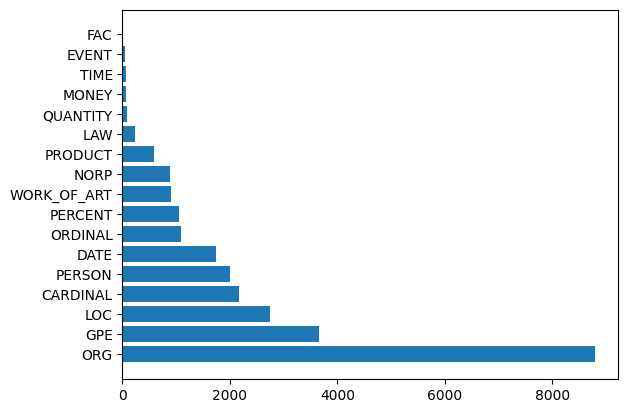

In [36]:
#LLM
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=data_LLM['text'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()
x,y=map(list,zip(*count))
plt.barh(x,y)

We can see that LLM tends to use more ***ORG*** related words . While , Humans tend to use use both ***ORG*** and ***GPE*** but ***ORG*** is more as compared to ***GPE***.

<BarContainer object of 7 artists>

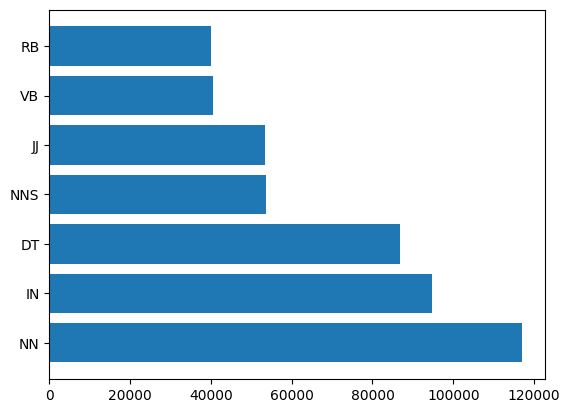

In [37]:
#Human
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=data_human['text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
plt.barh(x,y)

<BarContainer object of 7 artists>

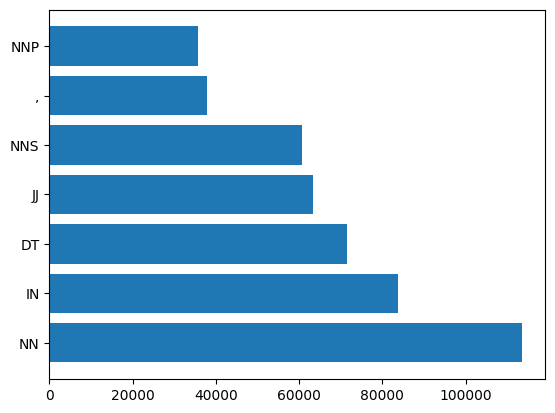

In [38]:
#LLM
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=data_LLM['text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
plt.barh(x,y)

<BarContainer object of 7 artists>

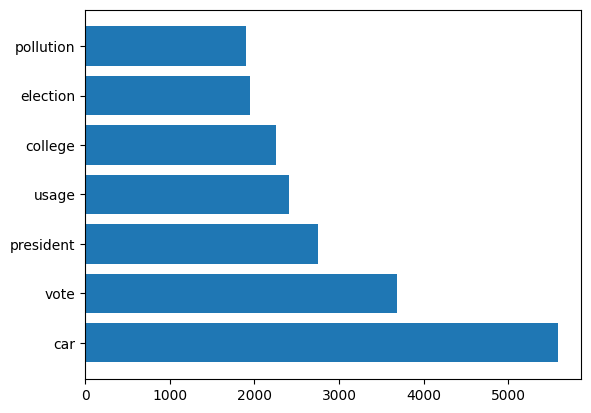

In [39]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj
words=data_human['text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
plt.barh(x,y)

<BarContainer object of 7 artists>

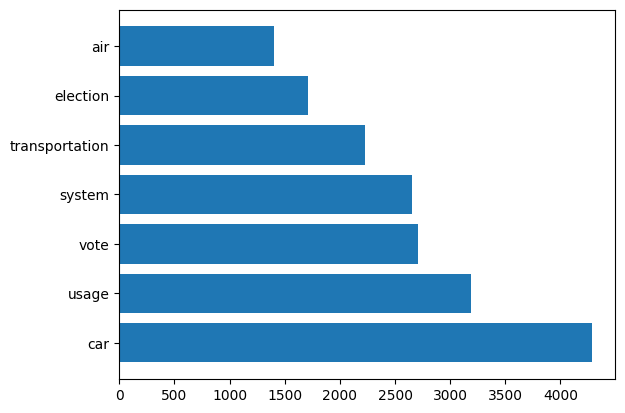

In [40]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj
words=data_LLM['text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
plt.barh(x,y)

# **Exploring through text complexity**

<Axes: >

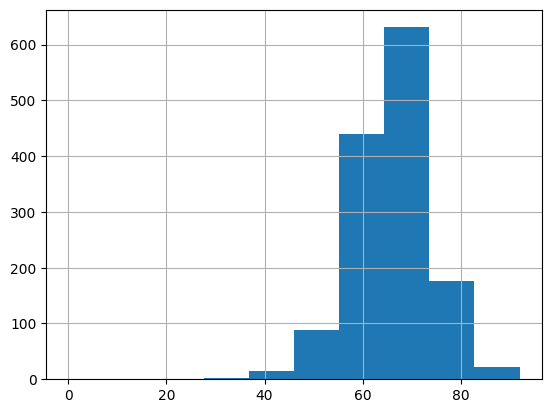

In [41]:
# Human
data_human['text'].apply(lambda x : flesch_reading_ease(x)).hist()

<Axes: >

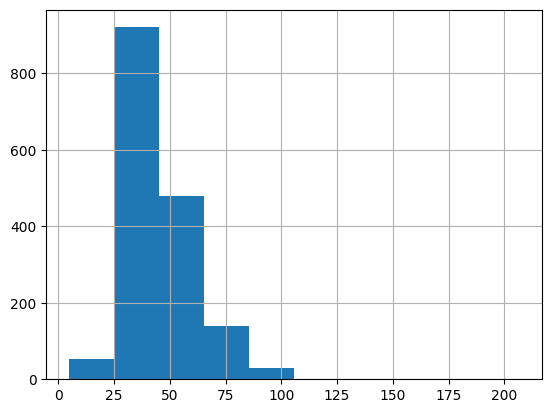

In [42]:
#LLM
data_LLM['text'].apply(lambda x : flesch_reading_ease(x)).hist()

**Flesch Reading Ease (FRE)** shows us that texts generated by LLMs are more difficult to read as compared to that of by humans . This could be a very intresting feature .

<Axes: >

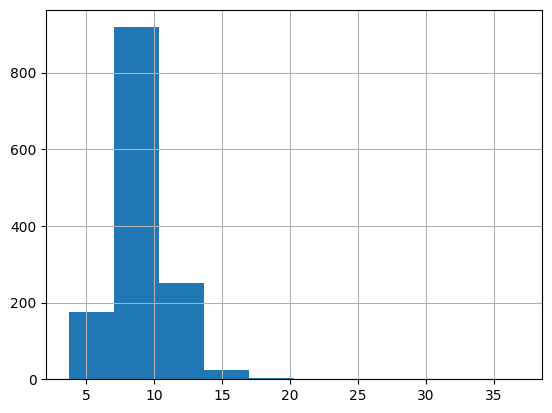

In [43]:
# Human
data_human['text'].apply(lambda x : flesch_kincaid_grade(x)).hist()

<Axes: >

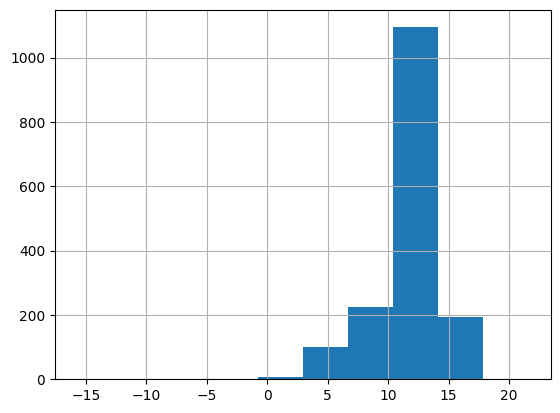

In [44]:
# LLM
data_LLM['text'].apply(lambda x : flesch_kincaid_grade(x)).hist()